In [5]:
"""
sweep with death rates to see if they ever reach zero
change into two alphas for uptick recently in data
"""

'\nsweep with death rates to see if they ever reach zero\nchange into two alphas for uptick recently in data\n'

In [2]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *
import pandas as pd

In [3]:
#import data
#not using html, trying to use csv
"""
from pandas import read_html

filename = 'data/book1.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')

table2.columns = ['num_colony']

"""

"\nfrom pandas import read_html\n\nfilename = 'data/book1.html'\ntables = read_html(filename, header=0, index_col=0, decimal='M')\n\ntable2.columns = ['num_colony']\n\n"

In [4]:
from pandas import read_csv

import csv
results = TimeSeries()
filename_csv = "data/book1.csv"
tables = read_csv(filename_csv, header=0, index_col=0, decimal='.')
tables = tables.dropna()
#with open(filename_csv, newline='') as csvfile:
#    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
#    n = 0
#    for row in reader:
#        if n > 0 and row[1] != '':
#             print(n, row)
#            results[int(row[0])] = int(row[1])
#        n += 1
        
#results = results[1:]
type(tables)

pandas.core.frame.DataFrame

In [5]:
tables.columns = ['colonies']
num_col = tables.colonies
num_col[1974]
type(num_col)

pandas.core.series.Series

-36.046511627906973

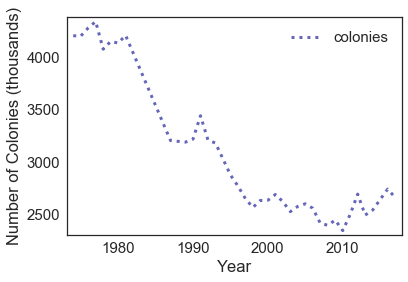

In [36]:
#plot data
def plot_estimates(table):
    """Plot colony data.
    
    table: DataFrame with columns 'year' and 'number of colonies'
    """
    
    
    plot(table, ':', color='darkblue', label='colonies')
    
    decorate(xlabel='Year',
             ylabel='Number of Colonies (thousands)')

newfig()
plot_estimates(tables)


t0 = tables.index[0] #start
t_end = tables.index[-1] #stop
p0 = num_col[first_year] #initial population
p_end = num_col[last_year] #final population
first_year, last_year

total_growth = p_end - p0
elapsed_time = t_end - t0
annual_growth = total_growth / elapsed_time
annual_growth

In [46]:
bees = System(t0 = tables.index[0], #start
t = tables.index,
t_end = tables.index[-1], #stop
p0 = num_col[first_year], #initial population           
p_end = num_col[last_year], #final population
alpha = .0018,
beta = 0.0001)

In [47]:
#make a model to fit data


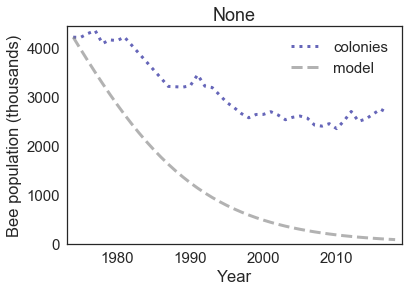

In [99]:
#quadratic
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results

run_simulation(bees, update_func2)

def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot_estimates(tables)
    plot(system.results, '--', color='gray', label='model')
    decorate(xlabel='Year', 
             ylabel='Bee population (thousands)',
             title=title)

bees.alpha = -0.00001
bees.beta = 0.00001

plot_results(bees)

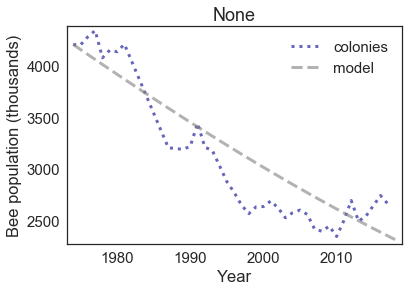

In [134]:
#quadratic
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results


def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot_estimates(tables)
    plot(system.results, '--', color='gray', label='model')
    decorate(xlabel='Year', 
             ylabel='Bee population (thousands)',
             title=title)

bees.alpha = -0.02
bees.beta = 0.000002

run_simulation(bees, update_func2)

plot_results(bees)

In [38]:
#two fit lines

In [39]:
#need to make an alpha, which varies on an array of growth rates, which come from data
#calculate growth rates for each year
#put in array
#assign to alpha
#run model using changing alpha, compare to data
#plot model against data, repeat for consistency

In [60]:
def net_growth(table):
    net_growth = table[n] - table[n-1]

In [61]:
net_growth(results)

KeyError: 45

In [10]:
#sweeping number of colonies with death rates
type(first_year)

numpy.int64

In [24]:
num_col[1974]

4210.0